In [3]:
import numpy as np
from matplotlib import pyplot as plt
from utils.wall_processing import get_envelope

def get_raw(file_name):
    data_file = np.load(file_name)
    return data_file

f_sampling=30_000_000


In [4]:
data = get_raw("Arterie_wall/data_6MHz/4.npy")

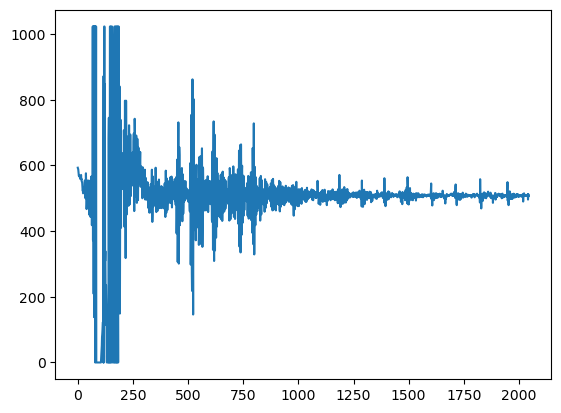

In [5]:
plt.plot(data[100,0,:])
#plt.xlim((65,85))

(100000.0, 600000.0)

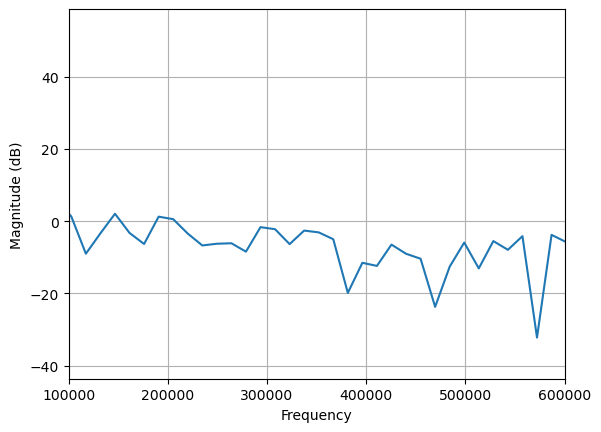

In [6]:
plt.magnitude_spectrum(data[0,0,:],f_sampling, scale="dB")
#plt.xscale("log")
plt.grid(which='both')
plt.xlim((100e3,600e3))
# -> max at 6.75 MHz

In [7]:
interpolation_factor=10
envelope = get_envelope(data[:,:,:].T, low=.1,high=.5,f_sampling=30_000_000, interpolation_factor = interpolation_factor)
#plt.plot(envelope[0,8,70:1770])
dt = 1/f_sampling/interpolation_factor
t = np.arange(0,data.shape[-1]*dt,dt)
c_sound_ecoflex = 1015.38 #m/s
c_sound_water = 1_500 #m/s
dx_ecoflex = (c_sound_ecoflex/2)*dt
dx_water = c_sound_water/2*dt

x = np.concatenate([np.linspace(-1e-3,0,65*interpolation_factor),np.arange(0,6.5e-3,dx_water),np.arange(6.5e-3,.04,dx_ecoflex)])
display(x.shape)
#plt.plot(x[:data.shape[-1]]*100,(np.array(data[0,0,:],dtype=float)-500))

envelope_gain = envelope*np.exp(70*x[:envelope.shape[-1]])

(23046,)

(array([ 29, 103, 207, 311, 421, 532, 647, 771]),
 {'peak_heights': array([538., 557., 564., 551., 555., 560., 560., 558.])})

array([ 74, 104, 104, 110, 111, 115, 124])

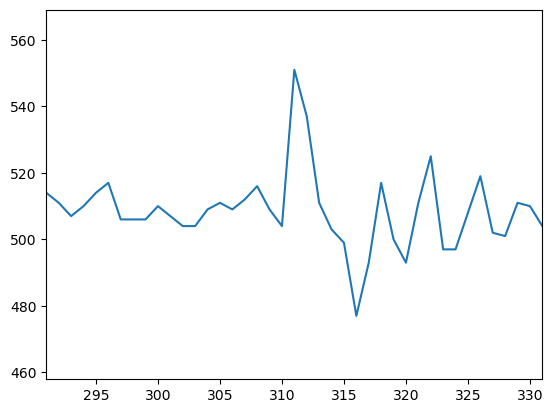

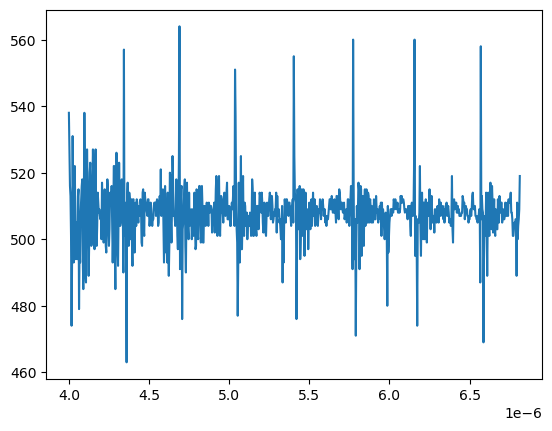

In [8]:
from scipy import signal as ss
plt.plot(data[0,0,1200:])
plt.xlim((311-20,311+20))
plt.figure()
plt.plot(t[1200:],data[0,0,1200:])
peaks = ss.find_peaks(data[0,0,1200:],height=535)
display(peaks)
peaks[0][1:]-peaks[0][:-1]


5684

10.619058199999646

52.25798982499592

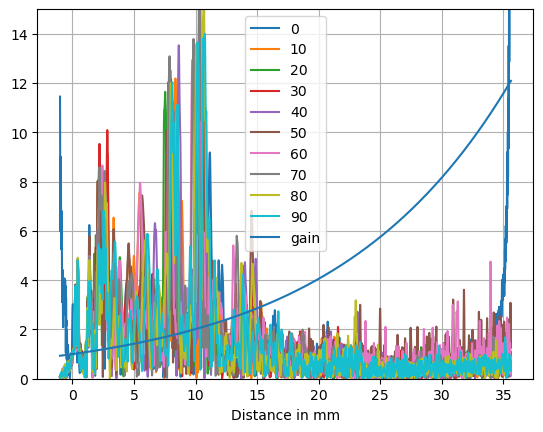

In [9]:
for i in range(10):
    plt.plot(x[:envelope.shape[-1]]*1000, envelope_gain[10*i,4,:]/100,label=i*10)

plt.plot(x[:envelope.shape[-1]]*1000, np.exp(70*x[:envelope.shape[-1]]),label="gain")
plt.legend()
#plt.xlim((2.3,2.4))
#plt.xlim((4,15))
plt.ylim((0,15))
plt.xlabel("Distance in mm")

plt.grid()
start = 4000
interface = x[np.argmax(envelope_gain[0,1,start:-10000])+start]*1000
display(np.argmax(envelope_gain[0,1,start:-10000])+start)
display(interface)
np.arccos(6.5/interface)/np.pi*180

(200, 2)


Text(0.5, 0, 'Time [s]')

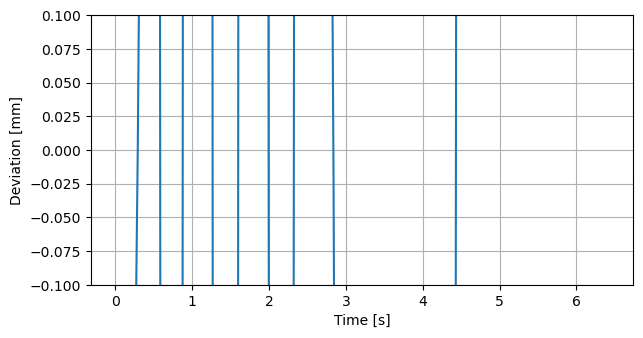

In [10]:
i_min1=np.searchsorted(x,1.e-2)
i_max1=np.searchsorted(x,1.5e-2)
channel = [0,1] 
max_location1= np.argmax(envelope_gain[:,channel,i_min1:i_max1],axis=-1)
print(max_location1.shape)
i_min2=np.searchsorted(x,2.6e-2)
i_max2=np.searchsorted(x,3e-2)
FPS = 31
max_location2= np.argmax(envelope_gain[:,channel,i_min2:i_max2],axis=-1)

t_pulse = np.arange(0,len(max_location1)/FPS,1/FPS)
filter_signal = lambda a: np.apply_along_axis(lambda m: np.convolve(m, np.ones(10), mode='same'), axis=0, arr=a)
max_location_filt = -filter_signal(max_location1-max_location1.mean(axis=0))
plt.figure(figsize=(7,3.5))
plt.plot(t_pulse,max_location_filt.mean(axis=-1)*dx_ecoflex*1000)
plt.grid()
plt.ylabel("Deviation [mm]")
plt.ylim((-.1,.1))
plt.xlabel("Time [s]")

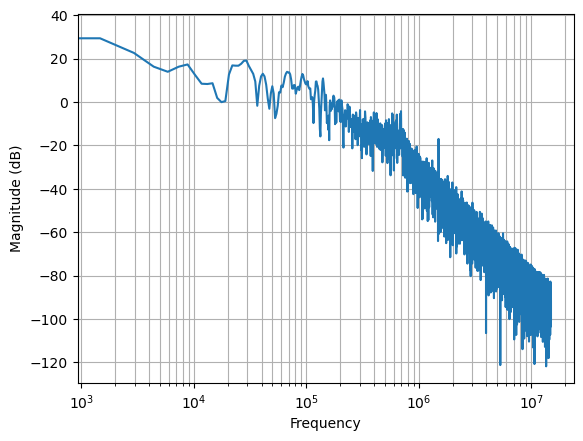

In [11]:
plt.magnitude_spectrum(envelope[0,8,:],f_sampling, scale="dB")
plt.xscale("log")
plt.grid(which='both')

(500.0, 750.0)

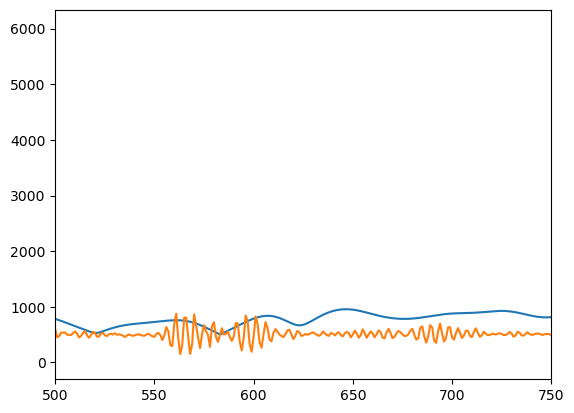

In [12]:
plt.plot(envelope[0,8,:]+500)
plt.plot(data[0,8,:])
plt.xlim((500,750))